# Visualization Gallery

This notebook demonstrates all visualization capabilities of the precip-index package using **real TerraClimate data from Bali, Indonesia (1958-2024)**. We'll explore:

1. **Basic index plots** - Time series with thresholds
2. **Event timeline plots** - Individual events highlighted
3. **Event evolution (5-panel)** - Comprehensive monitoring view
4. **Spatial statistics maps** - Gridded event characteristics
5. **Magnitude comparison** - Cumulative vs instantaneous
6. **Period comparison** - Historical vs recent
7. **Custom styling** - Publication-ready figures
8. **Batch processing** - Multiple locations

**Learning Objectives:**
1. Master all plotting functions
2. Customize visualizations for different purposes
3. Create publication-quality figures
4. Understand appropriate plot types for different analyses

## 1. Setup and Imports

In [1]:
# Add src directory to Python path
import sys
sys.path.insert(0, '../src')

# Core libraries
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from datetime import datetime
import os

# Event analysis
from runtheory import (
    identify_events,
    calculate_timeseries,
    calculate_period_statistics,
    compare_periods
)

# Visualization functions
from visualization import (
    plot_index,
    plot_events,
    plot_event_characteristics,
    plot_event_timeline,
    plot_spatial_stats,
    generate_location_filename
)

# Plotting settings
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

# Create output directories
os.makedirs('../output/plots/single', exist_ok=True)
os.makedirs('../output/plots/spatial', exist_ok=True)

print("✓ All imports successful!")
print("✓ Output directories ready")

✓ All imports successful!
✓ Output directories ready


## 2. Load Data and Prepare Examples

Load pre-calculated SPI-12 from Bali and prepare examples for visualization.

In [2]:
# Load SPI-12 from Bali
spi_file = '../output/netcdf/spi_12_bali.nc'

if not os.path.exists(spi_file):
    print("❌ SPI file not found. Please run notebook 01 first.")
    raise FileNotFoundError(f"File not found: {spi_file}")

spi = xr.open_dataset(spi_file)['spi_gamma_12_month']
print(f"✓ SPI-12 loaded: {spi.shape}")
print(f"  Location: Bali, Indonesia")
print(f"  Time range: {spi.time[0].values} to {spi.time[-1].values}")
print(f"  Spatial extent: {len(spi.lat)} x {len(spi.lon)} grid")

# Select sample location (center of Bali)
lat_idx = len(spi.lat) // 2
lon_idx = len(spi.lon) // 2
spi_loc = spi.isel(lat=lat_idx, lon=lon_idx)
lat_val = float(spi.lat.values[lat_idx])
lon_val = float(spi.lon.values[lon_idx])

print(f"\n✓ Sample location: {lat_val:.2f}°, {lon_val:.2f}° (Central Bali)")

# Calculate event characteristics
threshold = -1.2
events = identify_events(spi_loc, threshold=threshold, min_duration=3)
ts = calculate_timeseries(spi_loc, threshold=threshold)
stats_2020 = calculate_period_statistics(spi, threshold=threshold,
                                         start_year=2020, end_year=2020)

print(f"\n✓ Found {len(events)} dry events")
print(f"✓ Time series: {len(ts)} months")
print(f"✓ 2020 statistics calculated")
print("\n✓ All data ready for visualization!")

2026-01-25 12:15:15 | INFO     | runtheory | Calculating period statistics for 2020-2020
2026-01-25 12:15:15 | INFO     | runtheory | Processing location 0/840
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified

✓ SPI-12 loaded: (804, 24, 35)
  Location: Bali, Indonesia
  Time range: 1958-01-01T00:00:00.000000000 to 2024-12-01T00:00:00.000000000
  Spatial extent: 24 x 35 grid

✓ Sample location: -8.48°, 115.06° (Central Bali)


2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:15 | WARNING  | runtheory | No events found with


✓ Found 14 dry events
✓ Time series: 804 months
✓ 2020 statistics calculated

✓ All data ready for visualization!


## 3. Plot Type 1: Basic Index Visualization

**Function:** `plot_index()`

**Shows:**
- SPI/SPEI values over time
- Threshold line
- Color-coded severity
- Dry/wet periods highlighted

**Best for:** Simple time series visualization, initial exploration

✓ Saved: plot_basic_index_lat-8.48_lon115.06.png


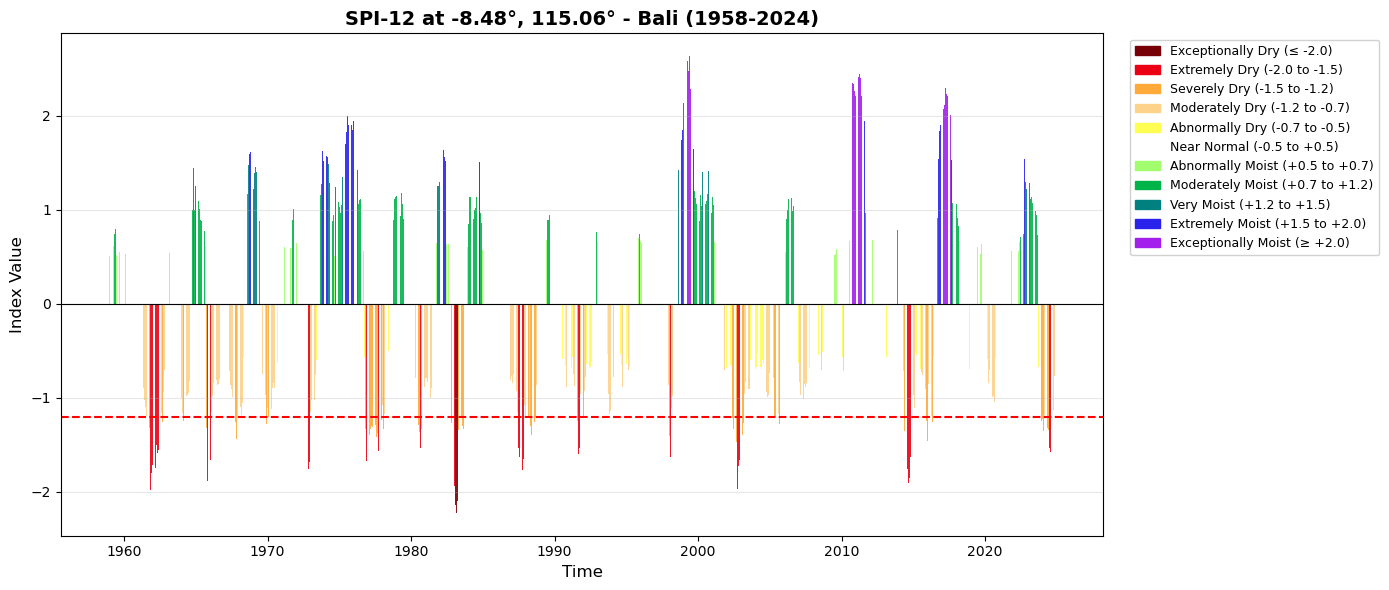

In [3]:
# Basic plot
fig = plot_index(spi_loc, threshold=threshold,
                 title=f'SPI-12 at {lat_val:.2f}°, {lon_val:.2f}° - Bali (1958-2024)')

filename = f'plot_basic_index_lat{lat_val:.2f}_lon{lon_val:.2f}.png'
plt.savefig(f'../output/plots/single/{filename}', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {filename}")

plt.show()

### Variations with Different Thresholds

✓ Saved: threshold_comparison_lat-8.48_lon115.06.png


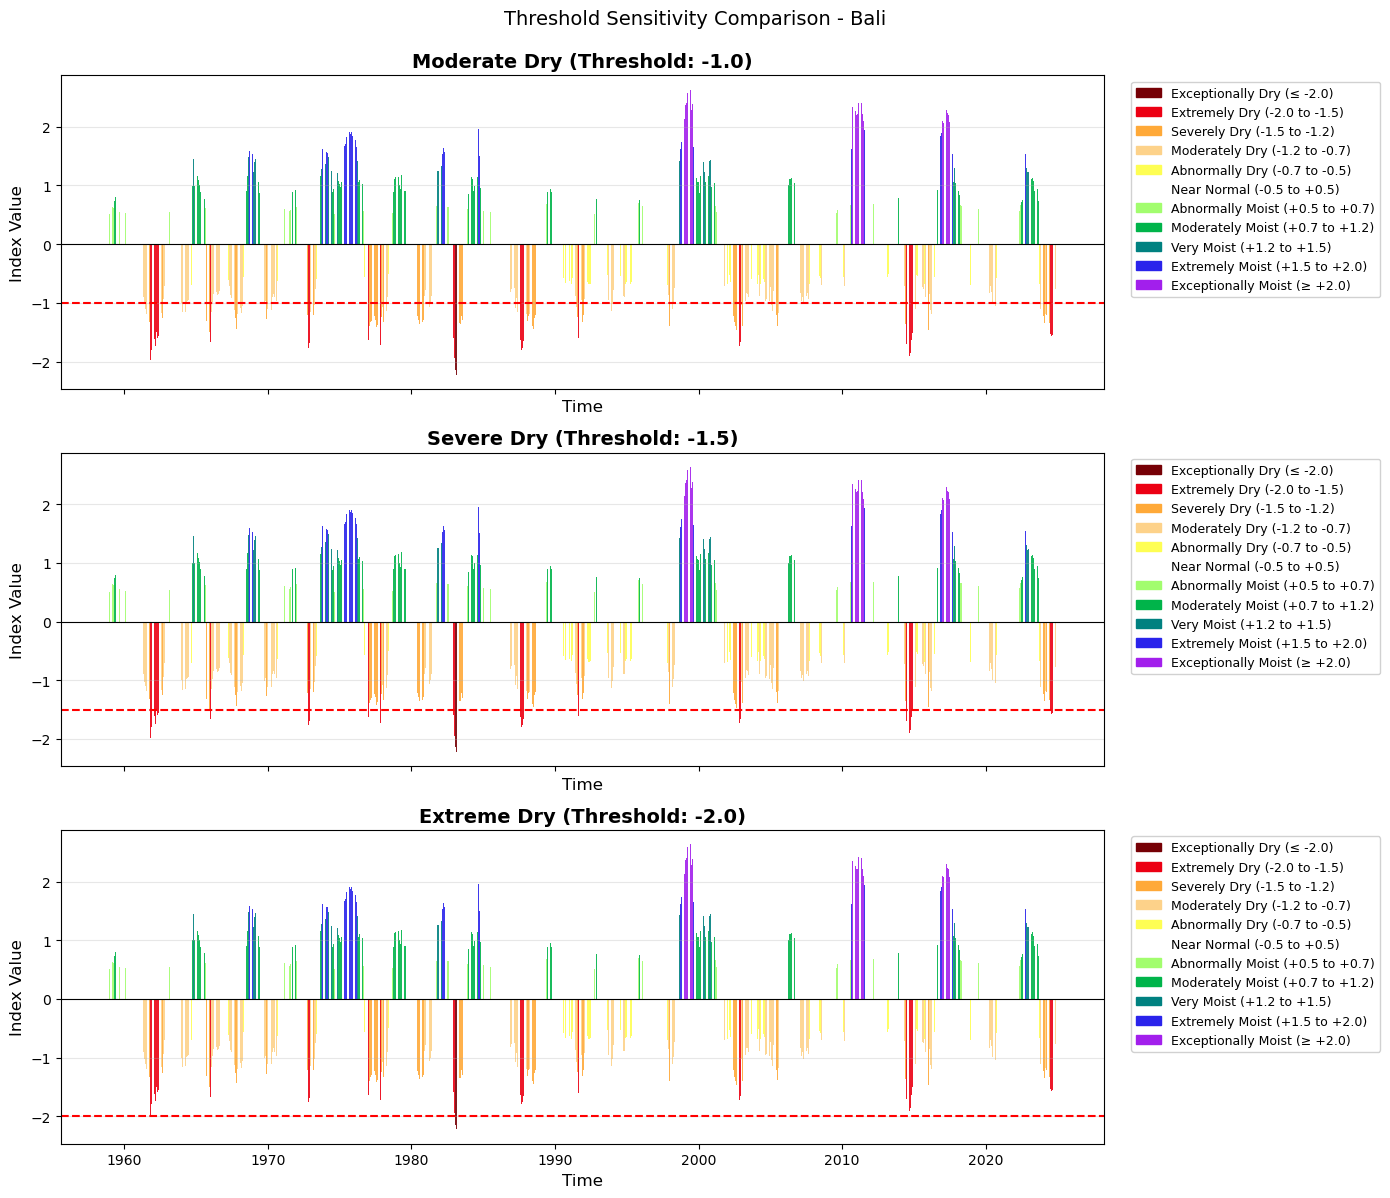

In [4]:
# Compare different thresholds
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

plot_index(spi_loc, threshold=-1.0, ax=ax1,
           title='Moderate Dry (Threshold: -1.0)')

plot_index(spi_loc, threshold=-1.5, ax=ax2,
           title='Severe Dry (Threshold: -1.5)')

plot_index(spi_loc, threshold=-2.0, ax=ax3,
           title='Extreme Dry (Threshold: -2.0)')

plt.suptitle('Threshold Sensitivity Comparison - Bali', fontsize=14, y=0.995)
plt.tight_layout()

filename = f'threshold_comparison_lat{lat_val:.2f}_lon{lon_val:.2f}.png'
plt.savefig(f'../output/plots/single/{filename}', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {filename}")

plt.show()

## 4. Plot Type 2: Event Timeline

**Function:** `plot_events()`

**Shows:**
- Individual events with unique colors
- Peak markers
- Event boundaries
- Event shading

**Best for:** Event identification, comparing event characteristics

✓ Saved: plot_events_lat-8.48_lon115.06.png


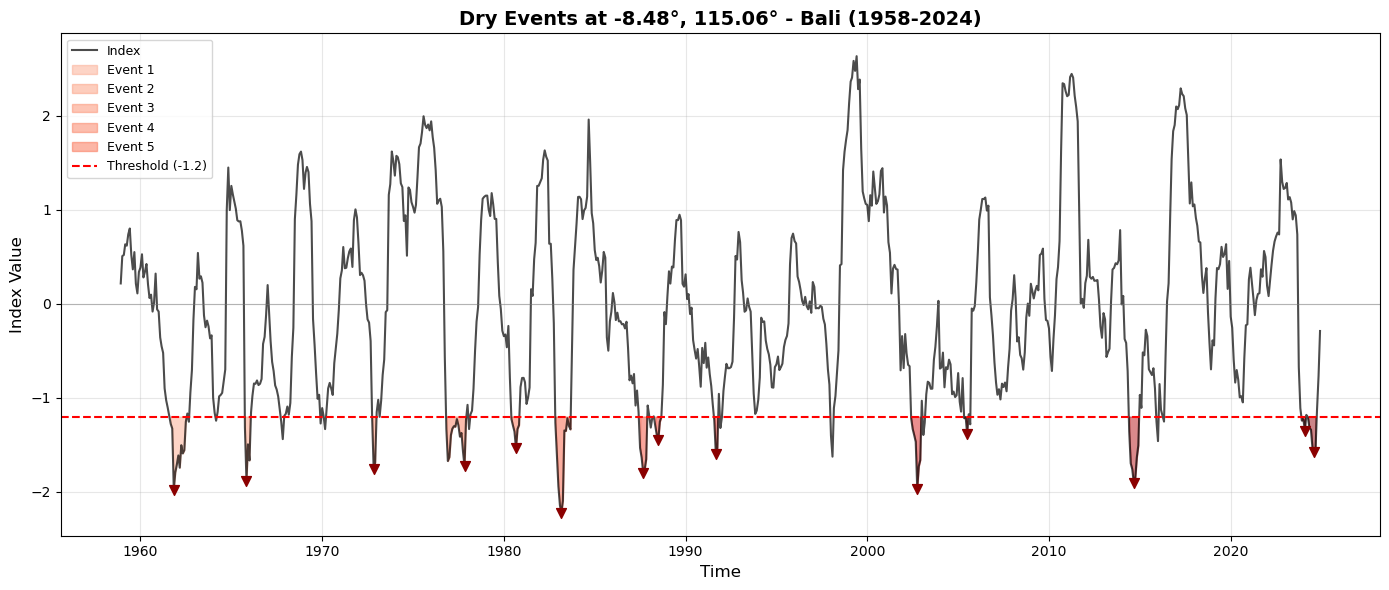


Showing 14 discrete dry events over 67 years
Each event shown in different color with peak markers


In [5]:
# Events timeline
fig = plot_events(spi_loc, events, threshold=threshold,
                  title=f'Dry Events at {lat_val:.2f}°, {lon_val:.2f}° - Bali (1958-2024)')

filename = f'plot_events_lat{lat_val:.2f}_lon{lon_val:.2f}.png'
plt.savefig(f'../output/plots/single/{filename}', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {filename}")

plt.show()

print(f"\nShowing {len(events)} discrete dry events over 67 years")
print("Each event shown in different color with peak markers")

### Add Custom Annotations

✓ Saved: events_annotated_lat-8.48_lon115.06.png


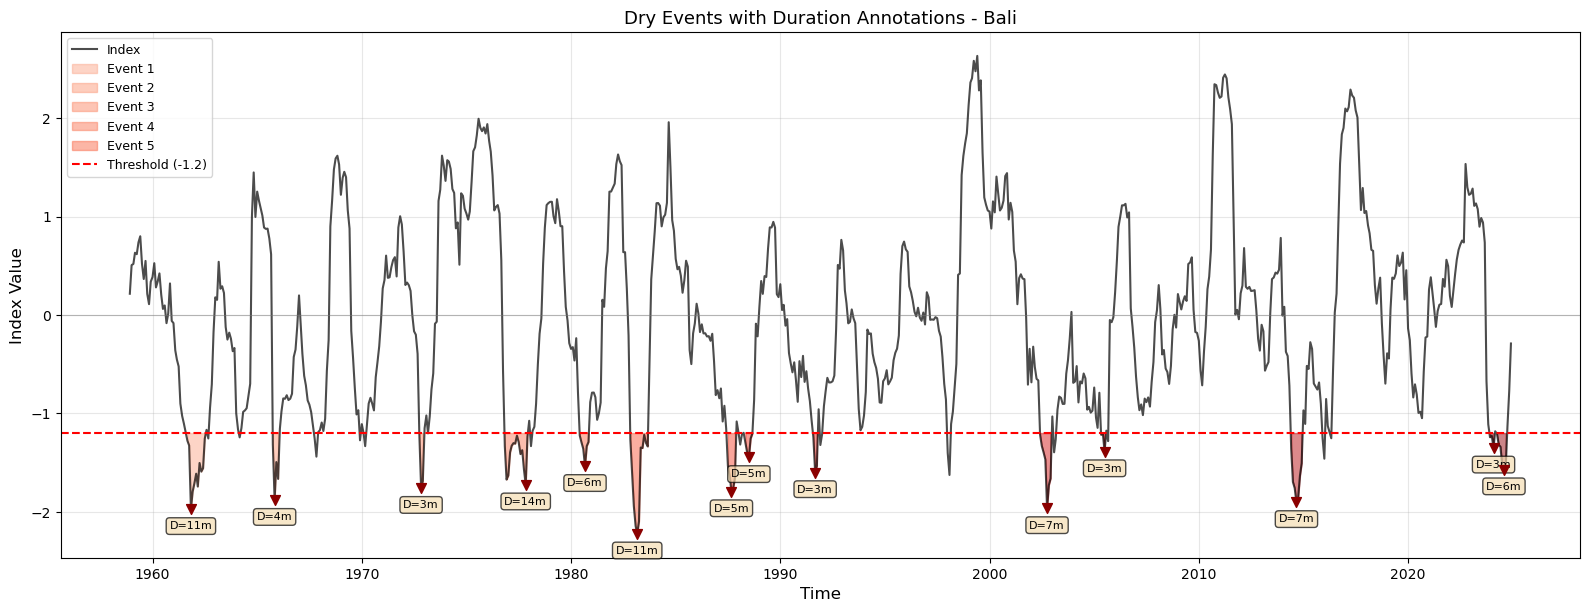

In [6]:
# Plot with custom annotations
fig, ax = plt.subplots(figsize=(16, 6))
plot_events(spi_loc, events, threshold=threshold, ax=ax)

# Add duration labels at peaks
for idx, event in events.iterrows():
    ax.text(event['peak_date'], event['peak'] - 0.2,
            f"D={int(event['duration'])}m",
            ha='center', fontsize=8,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='wheat', alpha=0.7))

ax.set_title('Dry Events with Duration Annotations - Bali', fontsize=13)

filename = f'events_annotated_lat{lat_val:.2f}_lon{lon_val:.2f}.png'
plt.savefig(f'../output/plots/single/{filename}', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {filename}")

plt.show()

## 5. Plot Type 3: Event Characteristics Analysis

**Function:** `plot_event_characteristics()`

**Shows:**
- Multi-panel analysis
- Distribution histograms
- Relationship scatter plots
- Time evolution

**Best for:** Understanding event patterns, comparing characteristics

✓ Saved: characteristics_lat-8.48_lon115.06.png


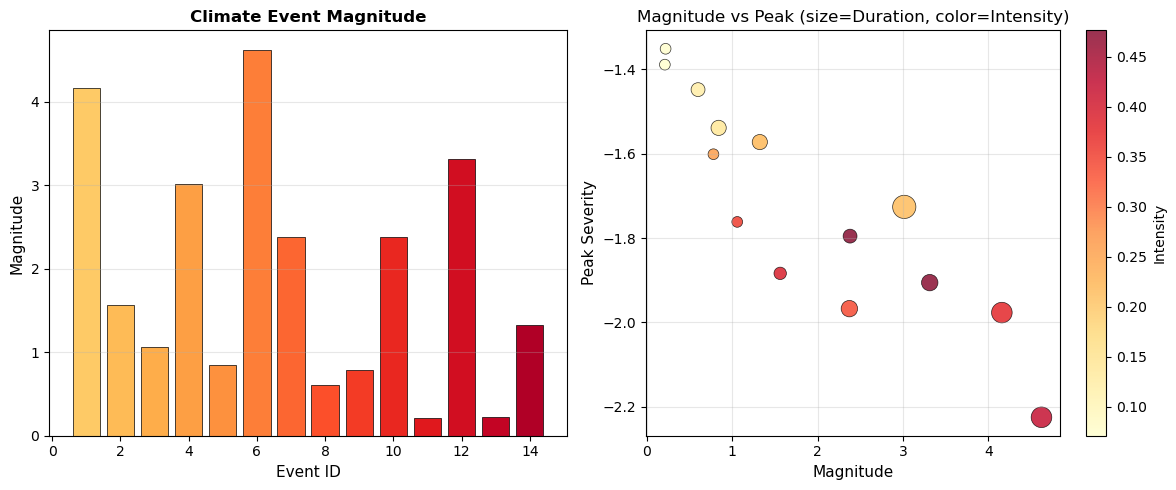

In [7]:
# Characteristics analysis
if len(events) > 0:
    fig = plot_event_characteristics(events, characteristic='magnitude')
    
    filename = f'characteristics_lat{lat_val:.2f}_lon{lon_val:.2f}.png'
    plt.savefig(f'../output/plots/single/{filename}', dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {filename}")
    
    plt.show()
else:
    print("No events to analyze characteristics")

## 6. Plot Type 4: Event Evolution Timeline (5-Panel)

**Function:** `plot_event_timeline()`

**Shows 5 panels:**
1. Index value (SPI/SPEI)
2. Duration (current event length)
3. Magnitude - Cumulative (blue, monotonic)
4. Magnitude - Instantaneous (red, variable)
5. Intensity (magnitude/duration)

**Best for:** Real-time monitoring, understanding event evolution

✓ Saved: timeline_5panel_lat-8.48_lon115.06.png


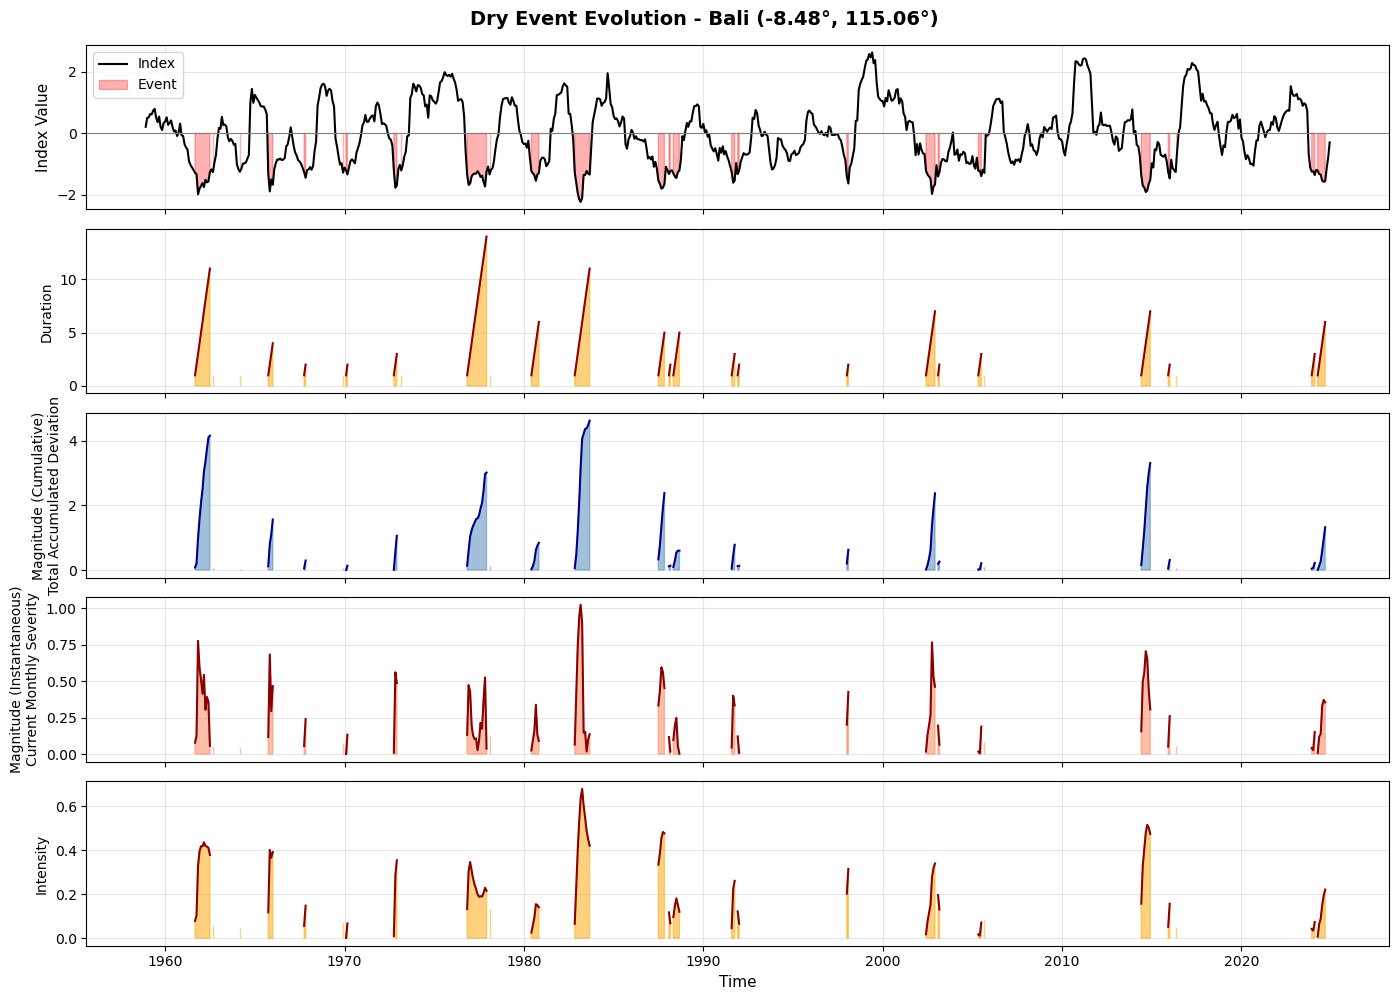


5-Panel Breakdown:
  Panel 1: SPI-12 with threshold
  Panel 2: Current event duration
  Panel 3: Cumulative magnitude (blue, always increasing)
  Panel 4: Instantaneous magnitude (red, NDVI-like)
  Panel 5: Intensity (cumulative/duration)


In [8]:
# 5-panel event evolution
fig = plot_event_timeline(ts)

# Add custom title
axes = fig.get_axes()
axes[0].set_title('')  # Remove default title
fig.suptitle(f'Dry Event Evolution - Bali ({lat_val:.2f}°, {lon_val:.2f}°)',
             fontsize=14, fontweight='bold', y=0.995)
plt.subplots_adjust(top=0.96)

filename = f'timeline_5panel_lat{lat_val:.2f}_lon{lon_val:.2f}.png'
plt.savefig(f'../output/plots/single/{filename}', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {filename}")

plt.show()

print("\n5-Panel Breakdown:")
print("  Panel 1: SPI-12 with threshold")
print("  Panel 2: Current event duration")
print("  Panel 3: Cumulative magnitude (blue, always increasing)")
print("  Panel 4: Instantaneous magnitude (red, NDVI-like)")
print("  Panel 5: Intensity (cumulative/duration)")

### Focus on Recent Period

✓ Saved: timeline_recent_lat-8.48_lon115.06.png


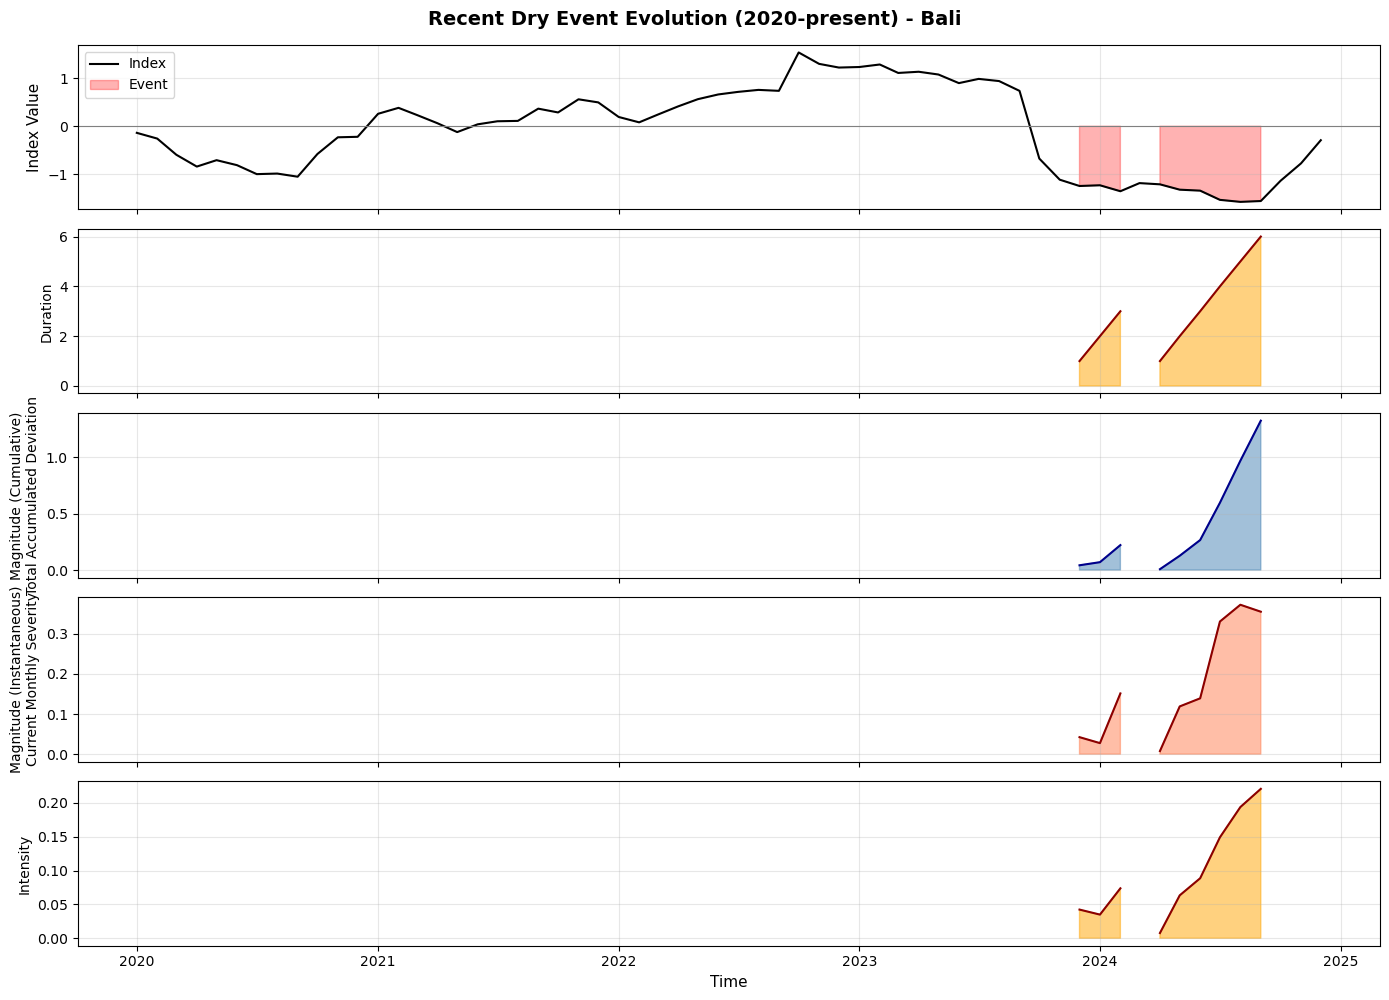

In [9]:
# Zoom into recent years
recent_ts = ts[ts.index >= '2020-01-01']  # Use .index instead of ['time']

if len(recent_ts) > 0:
    fig = plot_event_timeline(recent_ts)

    # Add custom title
    axes = fig.get_axes()
    axes[0].set_title('')
    fig.suptitle(f'Recent Dry Event Evolution (2020-present) - Bali',
                 fontsize=14, fontweight='bold', y=0.995)
    plt.subplots_adjust(top=0.96)

    filename = f'timeline_recent_lat{lat_val:.2f}_lon{lon_val:.2f}.png'
    plt.savefig(f'../output/plots/single/{filename}', dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {filename}")

    plt.show()
else:
    print("No recent data available")

## 7. Plot Type 5: Spatial Event Statistics

**Function:** `plot_spatial_stats()`

**Shows:**
- Maps of event statistics
- 9 available variables
- Customizable colormaps

**Best for:** Regional analysis, spatial patterns, decision support

### Map 1: Number of Events

✓ Saved: map_num_events_2020_bali.png


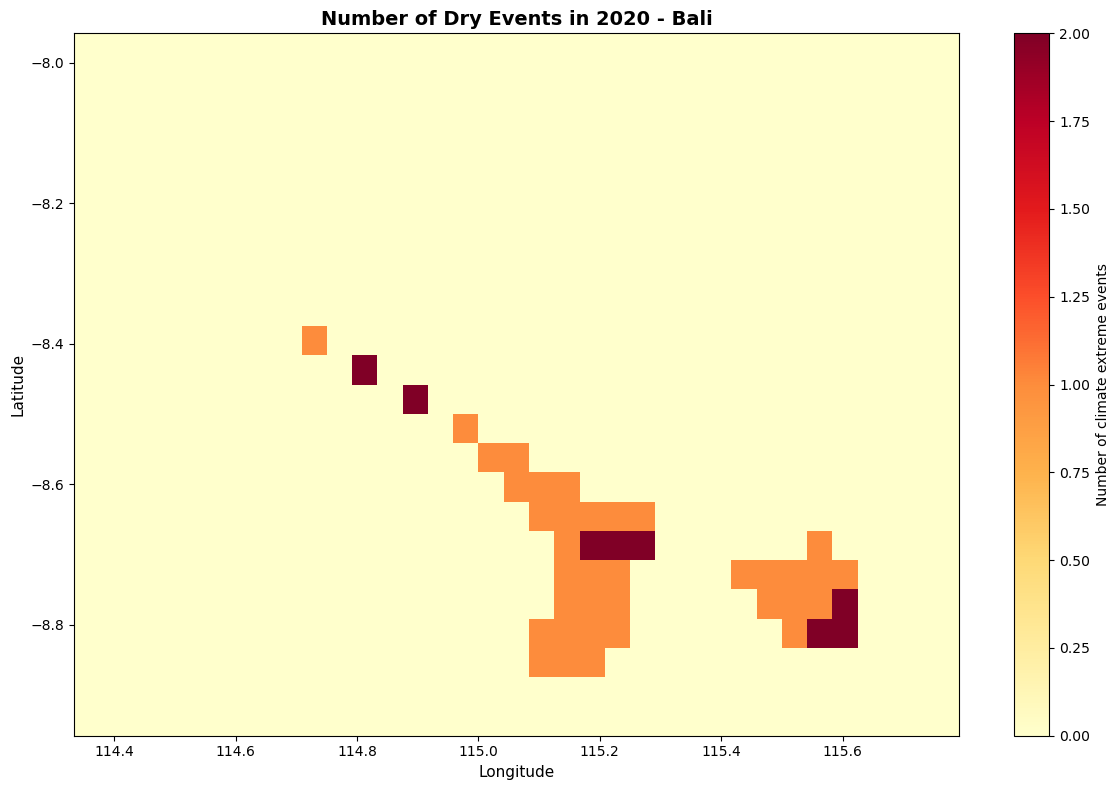

In [10]:
# Event count map
fig = plot_spatial_stats(stats_2020, variable='num_events',
                         title='Number of Dry Events in 2020 - Bali',
                         cmap='YlOrRd')

plt.savefig('../output/plots/spatial/map_num_events_2020_bali.png', dpi=300, bbox_inches='tight')
print("✓ Saved: map_num_events_2020_bali.png")

plt.show()

### Map 2: Worst Severity

✓ Saved: map_worst_peak_2020_bali.png


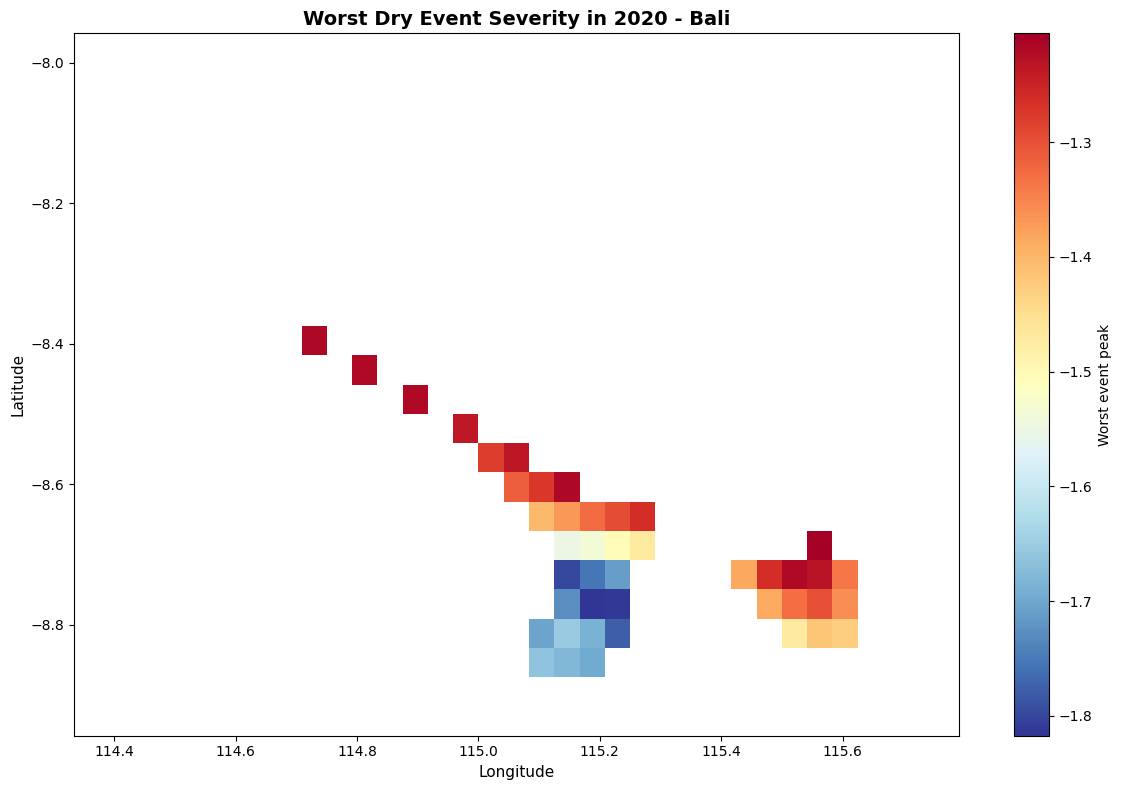

In [11]:
# Worst peak map
fig = plot_spatial_stats(stats_2020, variable='worst_peak',
                         title='Worst Dry Event Severity in 2020 - Bali',
                         cmap='RdYlBu_r')

plt.savefig('../output/plots/spatial/map_worst_peak_2020_bali.png', dpi=300, bbox_inches='tight')
print("✓ Saved: map_worst_peak_2020_bali.png")

plt.show()

### Map 3: Total Magnitude

✓ Saved: map_total_magnitude_2020_bali.png


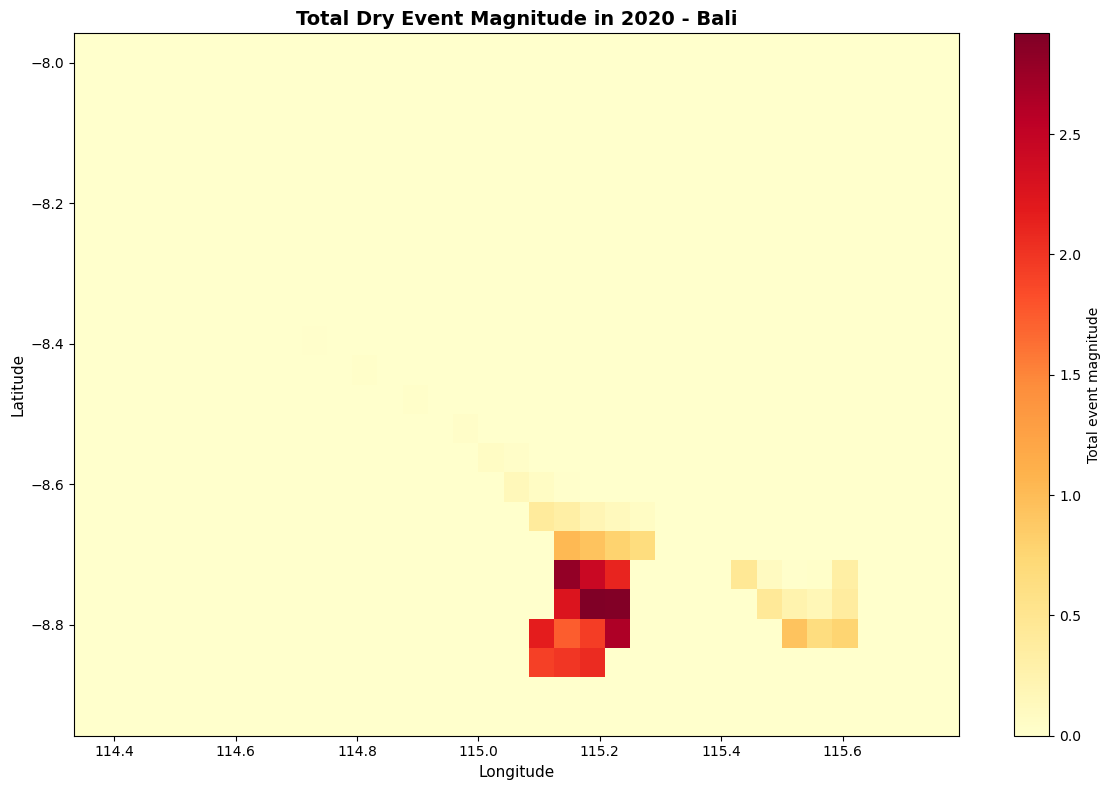

In [12]:
# Total magnitude map
fig = plot_spatial_stats(stats_2020, variable='total_magnitude',
                         title='Total Dry Event Magnitude in 2020 - Bali',
                         cmap='YlOrRd')

plt.savefig('../output/plots/spatial/map_total_magnitude_2020_bali.png', dpi=300, bbox_inches='tight')
print("✓ Saved: map_total_magnitude_2020_bali.png")

plt.show()

### Map 4: Percent Time in Event

✓ Saved: map_pct_drought_2020_bali.png


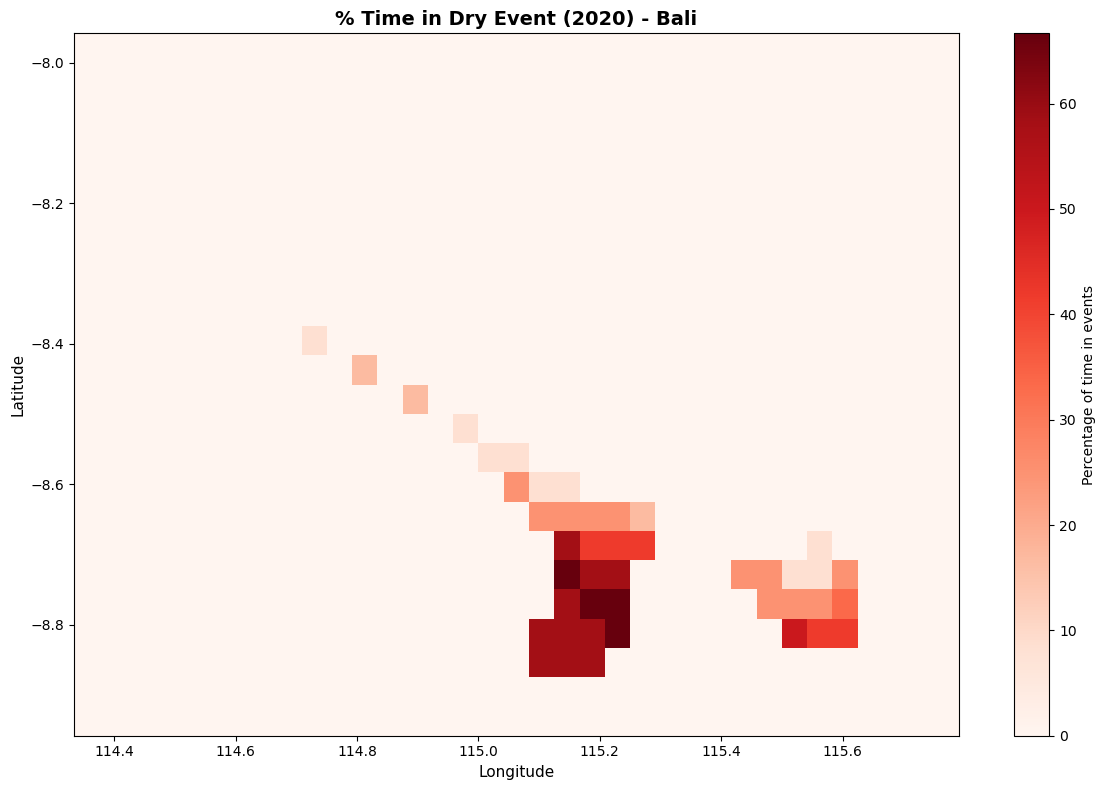

In [13]:
# Percent time map
fig = plot_spatial_stats(stats_2020, variable='pct_time_in_event',  # Changed from pct_time_in_drought
                         title='% Time in Dry Event (2020) - Bali',
                         cmap='Reds')

plt.savefig('../output/plots/spatial/map_pct_drought_2020_bali.png', dpi=300, bbox_inches='tight')
print("✓ Saved: map_pct_drought_2020_bali.png")

plt.show()

### Multi-Variable Panel

✓ Saved: map_panel_2020_bali.png


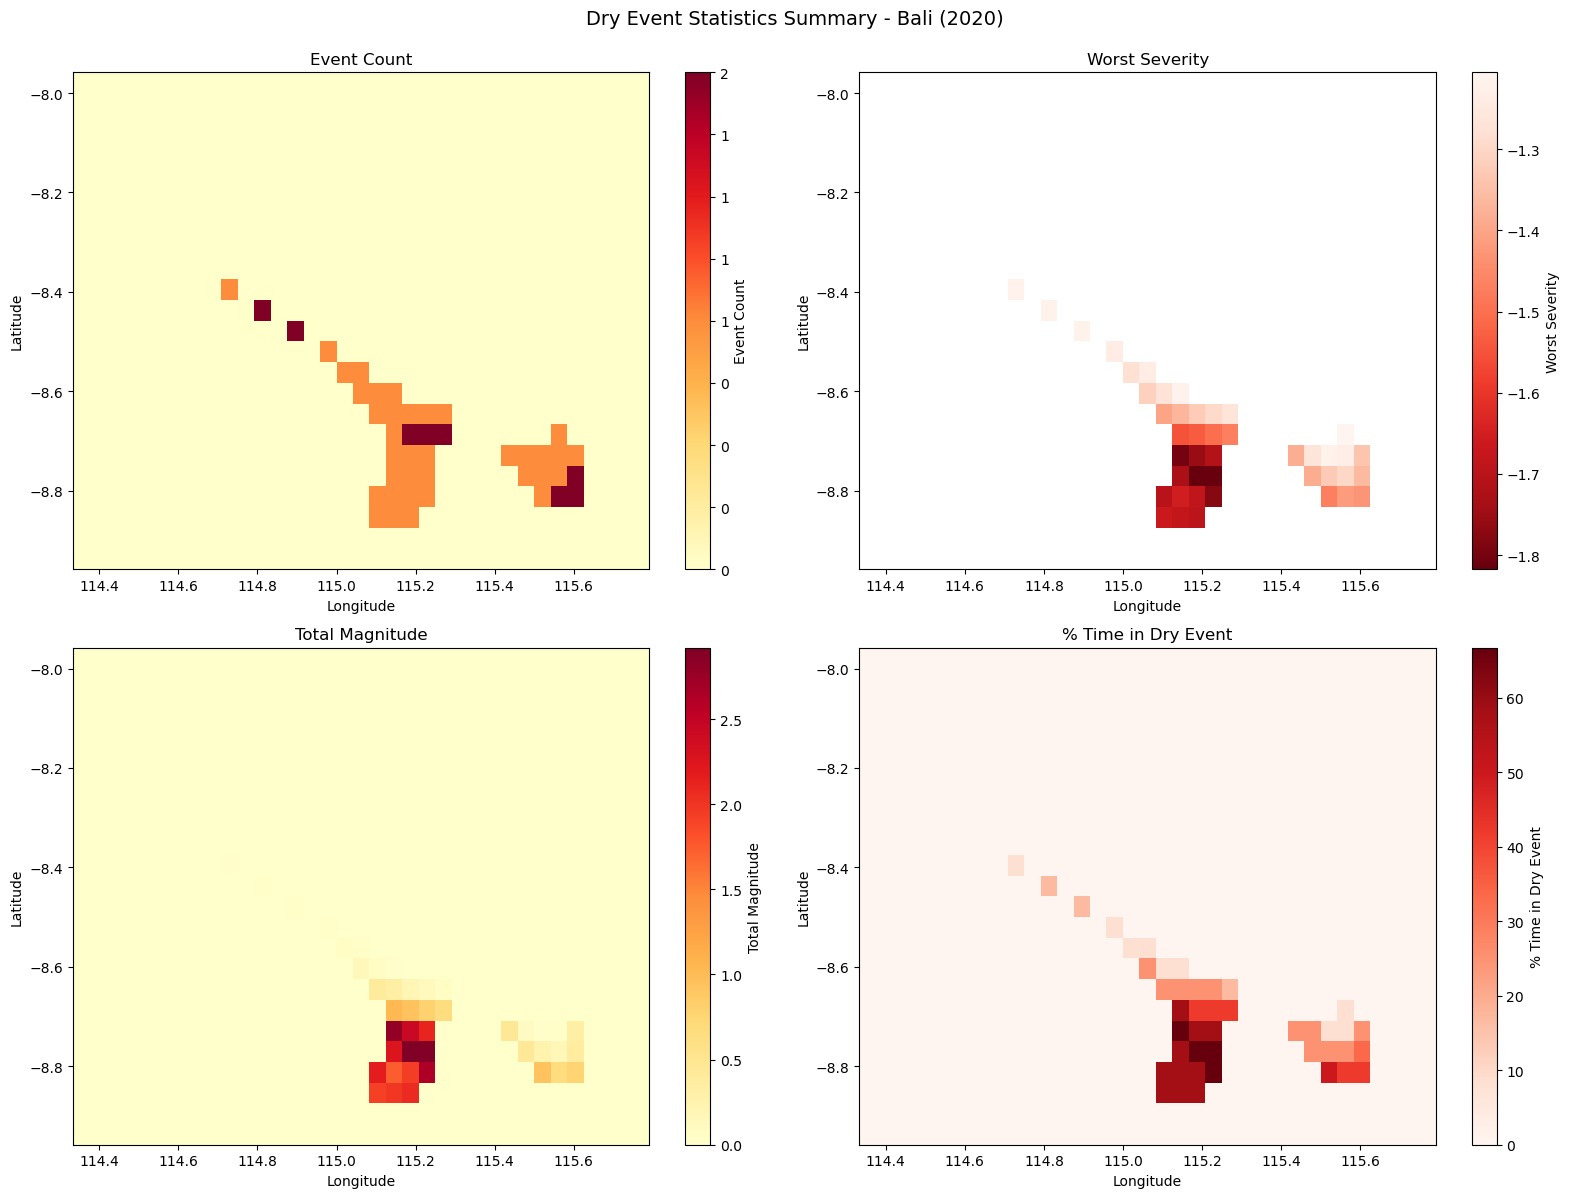

In [14]:
# 2x2 panel of key statistics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

variables = ['num_events', 'worst_peak', 'total_magnitude', 'pct_time_in_event']  # Changed from pct_time_in_drought
titles = ['Event Count', 'Worst Severity', 'Total Magnitude', '% Time in Dry Event']
cmaps = ['YlOrRd', 'Reds_r', 'YlOrRd', 'Reds']  # Changed worst_peak to Reds_r

for ax, var, title, cmap in zip(axes.flat, variables, titles, cmaps):
    # Integer format for event count
    if var == 'num_events':
        cbar_kwargs = {'label': title, 'format': '%d'}
    else:
        cbar_kwargs = {'label': title}
    
    stats_2020[var].plot(ax=ax, cmap=cmap, cbar_kwargs=cbar_kwargs)
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

plt.suptitle('Dry Event Statistics Summary - Bali (2020)', fontsize=14, y=0.995)
plt.tight_layout()

plt.savefig('../output/plots/spatial/map_panel_2020_bali.png', dpi=300, bbox_inches='tight')
print("✓ Saved: map_panel_2020_bali.png")

plt.show()

## 8. Magnitude Comparison Plots

Visualize both magnitude types to understand their differences.

### Stacked Comparison

✓ Saved: magnitude_stacked_lat-8.48_lon115.06.png


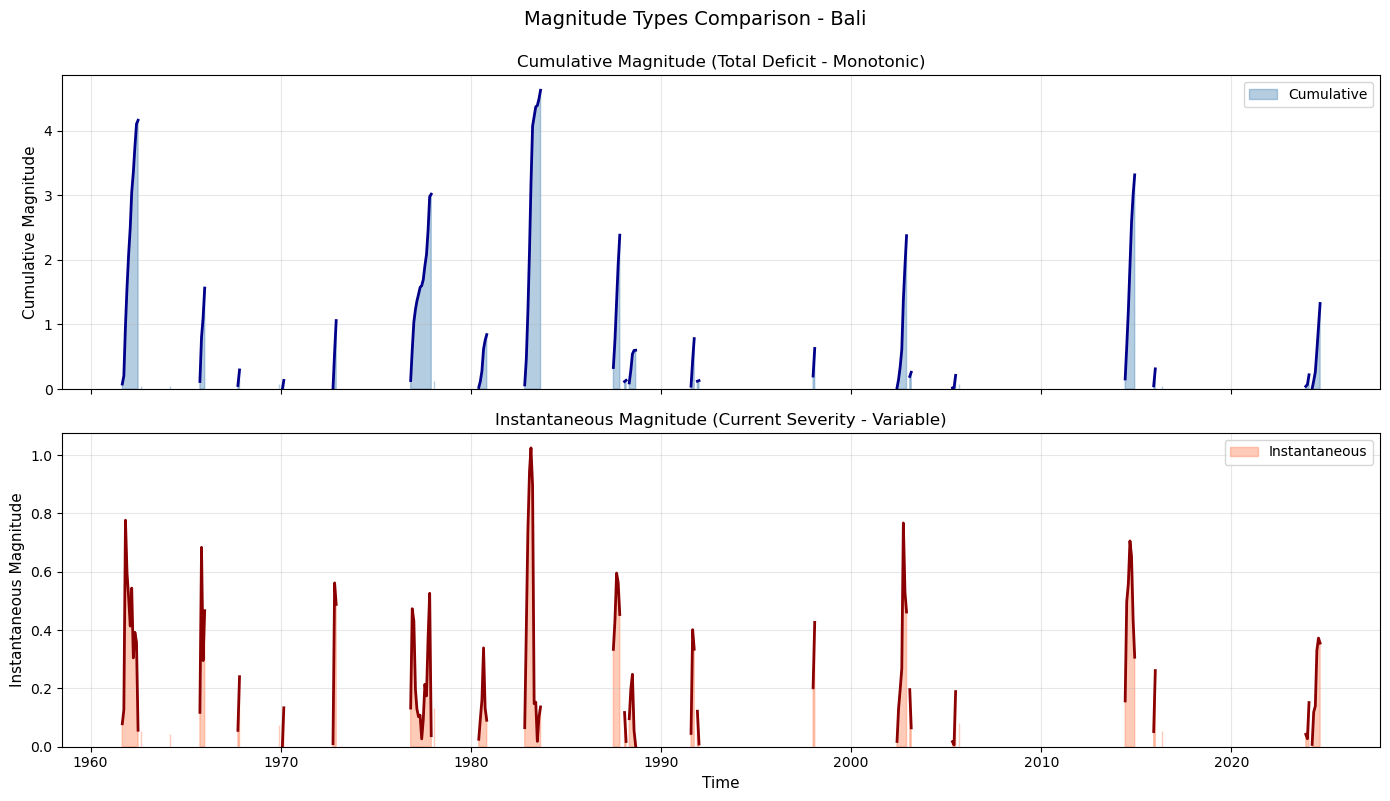

In [15]:
# Dual magnitude - stacked
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Get event mask
event_mask = ts['is_event']
cumulative_event = ts['magnitude_cumulative'].where(event_mask)
instantaneous_event = ts['magnitude_instantaneous'].where(event_mask)

# Cumulative (blue)
ax1.fill_between(ts.index, 0, cumulative_event,
                 alpha=0.4, color='steelblue', label='Cumulative')
ax1.plot(ts.index, cumulative_event, color='darkblue', linewidth=2)
ax1.set_ylabel('Cumulative Magnitude', fontsize=11)
ax1.set_title('Cumulative Magnitude (Total Deficit - Monotonic)', fontsize=12)
ax1.set_ylim(bottom=0)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Instantaneous (red)
ax2.fill_between(ts.index, 0, instantaneous_event,
                 alpha=0.4, color='coral', label='Instantaneous')
ax2.plot(ts.index, instantaneous_event, color='darkred', linewidth=2)
ax2.set_ylabel('Instantaneous Magnitude', fontsize=11)
ax2.set_xlabel('Time', fontsize=11)
ax2.set_title('Instantaneous Magnitude (Current Severity - Variable)', fontsize=12)
ax2.set_ylim(bottom=0)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.suptitle('Magnitude Types Comparison - Bali', fontsize=14, y=0.995)
plt.tight_layout()

filename = f'magnitude_stacked_lat{lat_val:.2f}_lon{lon_val:.2f}.png'
plt.savefig(f'../output/plots/single/{filename}', dpi=300, bbox_inches='tight')
print(f"✓ Saved: {filename}")

plt.show()

### Twin-Axis Comparison

✓ Saved: magnitude_twin_lat-8.48_lon115.06.png


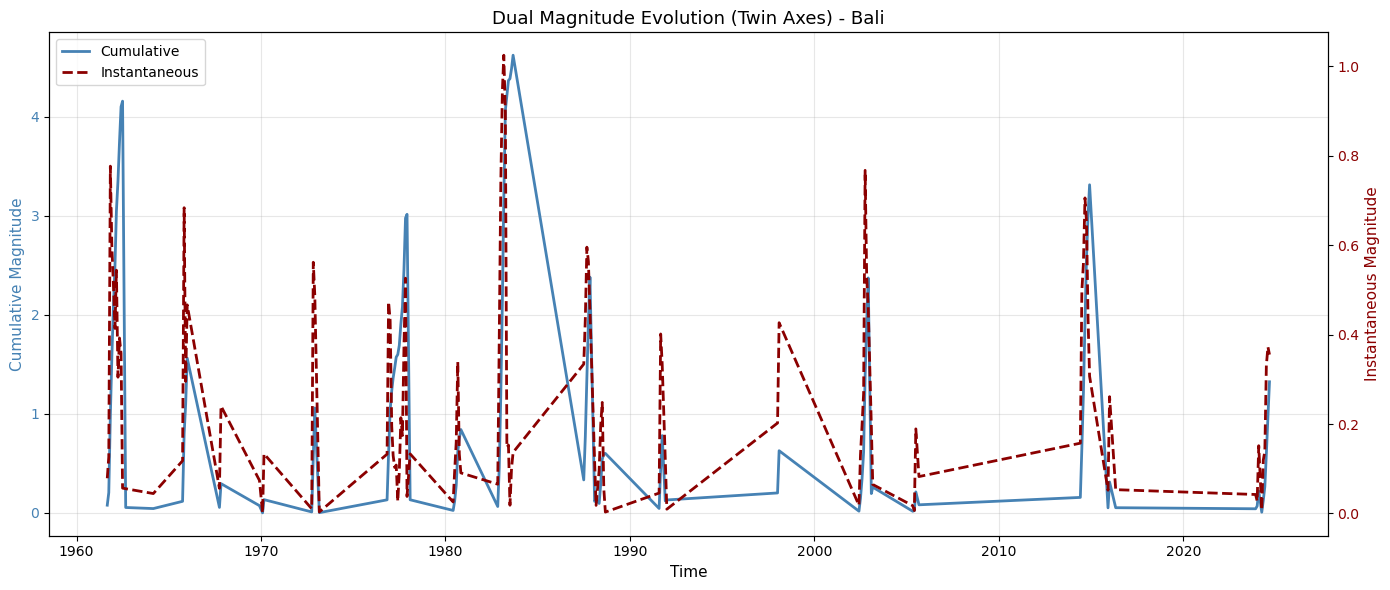


Key Observation:
  Blue (cumulative) always increases during event
  Red (instantaneous) varies with SPI pattern (peaks and valleys)
  See docs/user-guide/magnitude.md for detailed explanation


In [16]:
# Dual magnitude - twin axes
event_mask = ts['is_event']
event_periods = ts[event_mask]  # Filter to only event periods

if len(event_periods) > 0:
    fig, ax1 = plt.subplots(figsize=(14, 6))
    
    # Cumulative (left)
    color1 = 'steelblue'
    ax1.set_xlabel('Time', fontsize=11)
    ax1.set_ylabel('Cumulative Magnitude', color=color1, fontsize=11)
    ax1.plot(event_periods.index, event_periods['magnitude_cumulative'],
             color=color1, linewidth=2, label='Cumulative')
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.grid(True, alpha=0.3)
    
    # Instantaneous (right)
    ax2 = ax1.twinx()
    color2 = 'darkred'
    ax2.set_ylabel('Instantaneous Magnitude', color=color2, fontsize=11)
    ax2.plot(event_periods.index, event_periods['magnitude_instantaneous'],
             color=color2, linewidth=2, linestyle='--', label='Instantaneous')
    ax2.tick_params(axis='y', labelcolor=color2)
    
    plt.title('Dual Magnitude Evolution (Twin Axes) - Bali', fontsize=13)
    
    # Combined legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
    
    fig.tight_layout()
    
    filename = f'magnitude_twin_lat{lat_val:.2f}_lon{lon_val:.2f}.png'
    plt.savefig(f'../output/plots/single/{filename}', dpi=300, bbox_inches='tight')
    print(f"✓ Saved: {filename}")
    
    plt.show()
    
    print("\nKey Observation:")
    print("  Blue (cumulative) always increases during event")
    print("  Red (instantaneous) varies with SPI pattern (peaks and valleys)")
    print("  See docs/user-guide/magnitude.md for detailed explanation")
else:
    print("No event periods to plot")

## 9. Period Comparison Visualizations

In [17]:
# Calculate comparison
print("Comparing historical vs recent periods...")
comparison = compare_periods(
    spi,
    periods=[(1991, 2020), (2021, 2024)],
    period_names=['Historical (1991-2020)', 'Recent (2021-2024)'],
    threshold=threshold,
    min_duration=3
)
print("✓ Comparison calculated")

2026-01-25 12:15:39 | INFO     | runtheory | Comparing 2 periods
2026-01-25 12:15:39 | INFO     | runtheory | Processing period: Historical (1991-2020) (1991-2020)
2026-01-25 12:15:39 | INFO     | runtheory | Calculating period statistics for 1991-2020
2026-01-25 12:15:39 | INFO     | runtheory | Processing location 0/840
2026-01-25 12:15:39 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:39 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:39 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:39 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:39 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:39 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:39 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:39 | WARNING  | runtheory | No events found with specified crite

Comparing historical vs recent periods...


2026-01-25 12:15:39 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:39 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:39 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:39 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:39 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:39 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:39 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:39 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:39 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:39 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:39 | WARNING  | runtheory | No events found with specified criteria
2026-01-25 12:15:39 | WARNING  | runtheory | No events found with

✓ Comparison calculated


### Side-by-Side Comparison

✓ Saved: comparison_sidebyside_bali.png


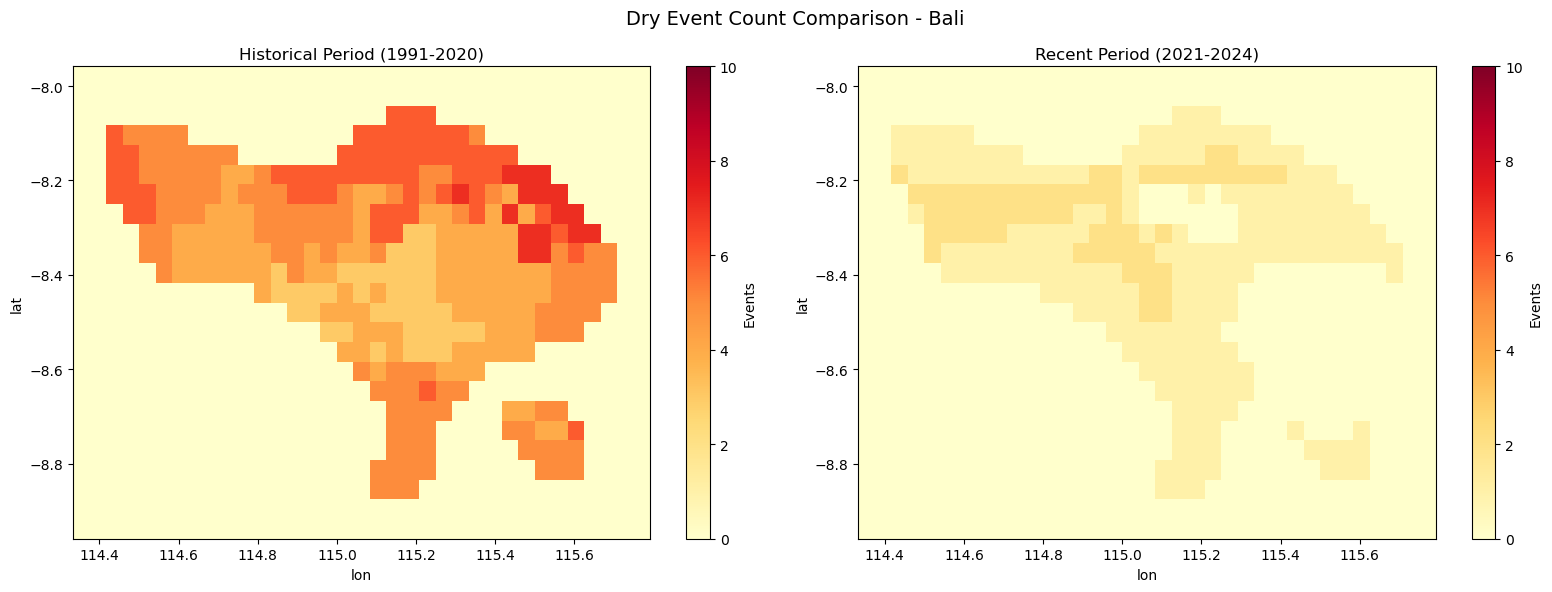

In [18]:
# Plot both periods
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Historical
comparison.sel(period='Historical (1991-2020)').num_events.plot(
    ax=ax1, cmap='YlOrRd', vmin=0, vmax=10,
    cbar_kwargs={'label': 'Events'}
)
ax1.set_title('Historical Period (1991-2020)', fontsize=12)

# Recent
comparison.sel(period='Recent (2021-2024)').num_events.plot(
    ax=ax2, cmap='YlOrRd', vmin=0, vmax=10,
    cbar_kwargs={'label': 'Events'}
)
ax2.set_title('Recent Period (2021-2024)', fontsize=12)

plt.suptitle('Dry Event Count Comparison - Bali', fontsize=14, y=0.98)
plt.tight_layout()

plt.savefig('../output/plots/spatial/comparison_sidebyside_bali.png', dpi=300, bbox_inches='tight')
print("✓ Saved: comparison_sidebyside_bali.png")

plt.show()

### Difference Map

✓ Saved: comparison_difference_bali.png


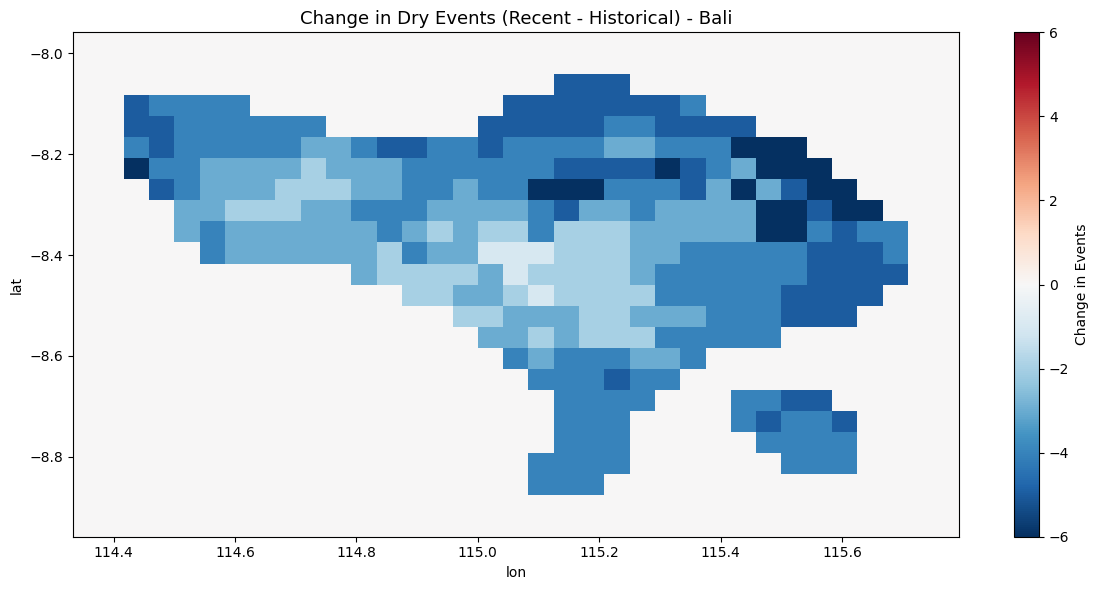


Average change in events: -1.43
  → Fewer dry events in recent period


In [19]:
# Calculate and plot difference
diff = comparison.sel(period='Recent (2021-2024)') - comparison.sel(period='Historical (1991-2020)')

fig, ax = plt.subplots(figsize=(12, 6))

diff.num_events.plot(ax=ax, cmap='RdBu_r', center=0,
                     cbar_kwargs={'label': 'Change in Events'})
ax.set_title('Change in Dry Events (Recent - Historical) - Bali', fontsize=13)

plt.tight_layout()
plt.savefig('../output/plots/spatial/comparison_difference_bali.png', dpi=300, bbox_inches='tight')
print("✓ Saved: comparison_difference_bali.png")

plt.show()

# Print summary
mean_change = float(diff.num_events.mean().values)
print(f"\nAverage change in events: {mean_change:+.2f}")
if mean_change > 0:
    print("  → More dry events in recent period")
elif mean_change < 0:
    print("  → Fewer dry events in recent period")
else:
    print("  → No change in average events")

## 10. Custom Styling and Publication Quality

### Publication Settings

In [20]:
# Set publication-quality parameters
plt.rcParams.update({
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'font.family': 'serif',
    'font.size': 11,
    'axes.labelsize': 12,
    'axes.titlesize': 13,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'figure.titlesize': 14
})

print("✓ Publication settings activated")

✓ Publication settings activated


✓ Saved publication figures:
  publication_lat-8.48_lon115.06.png (raster, 300 dpi)
  publication_lat-8.48_lon115.06.pdf (vector)
  publication_lat-8.48_lon115.06.svg (vector)


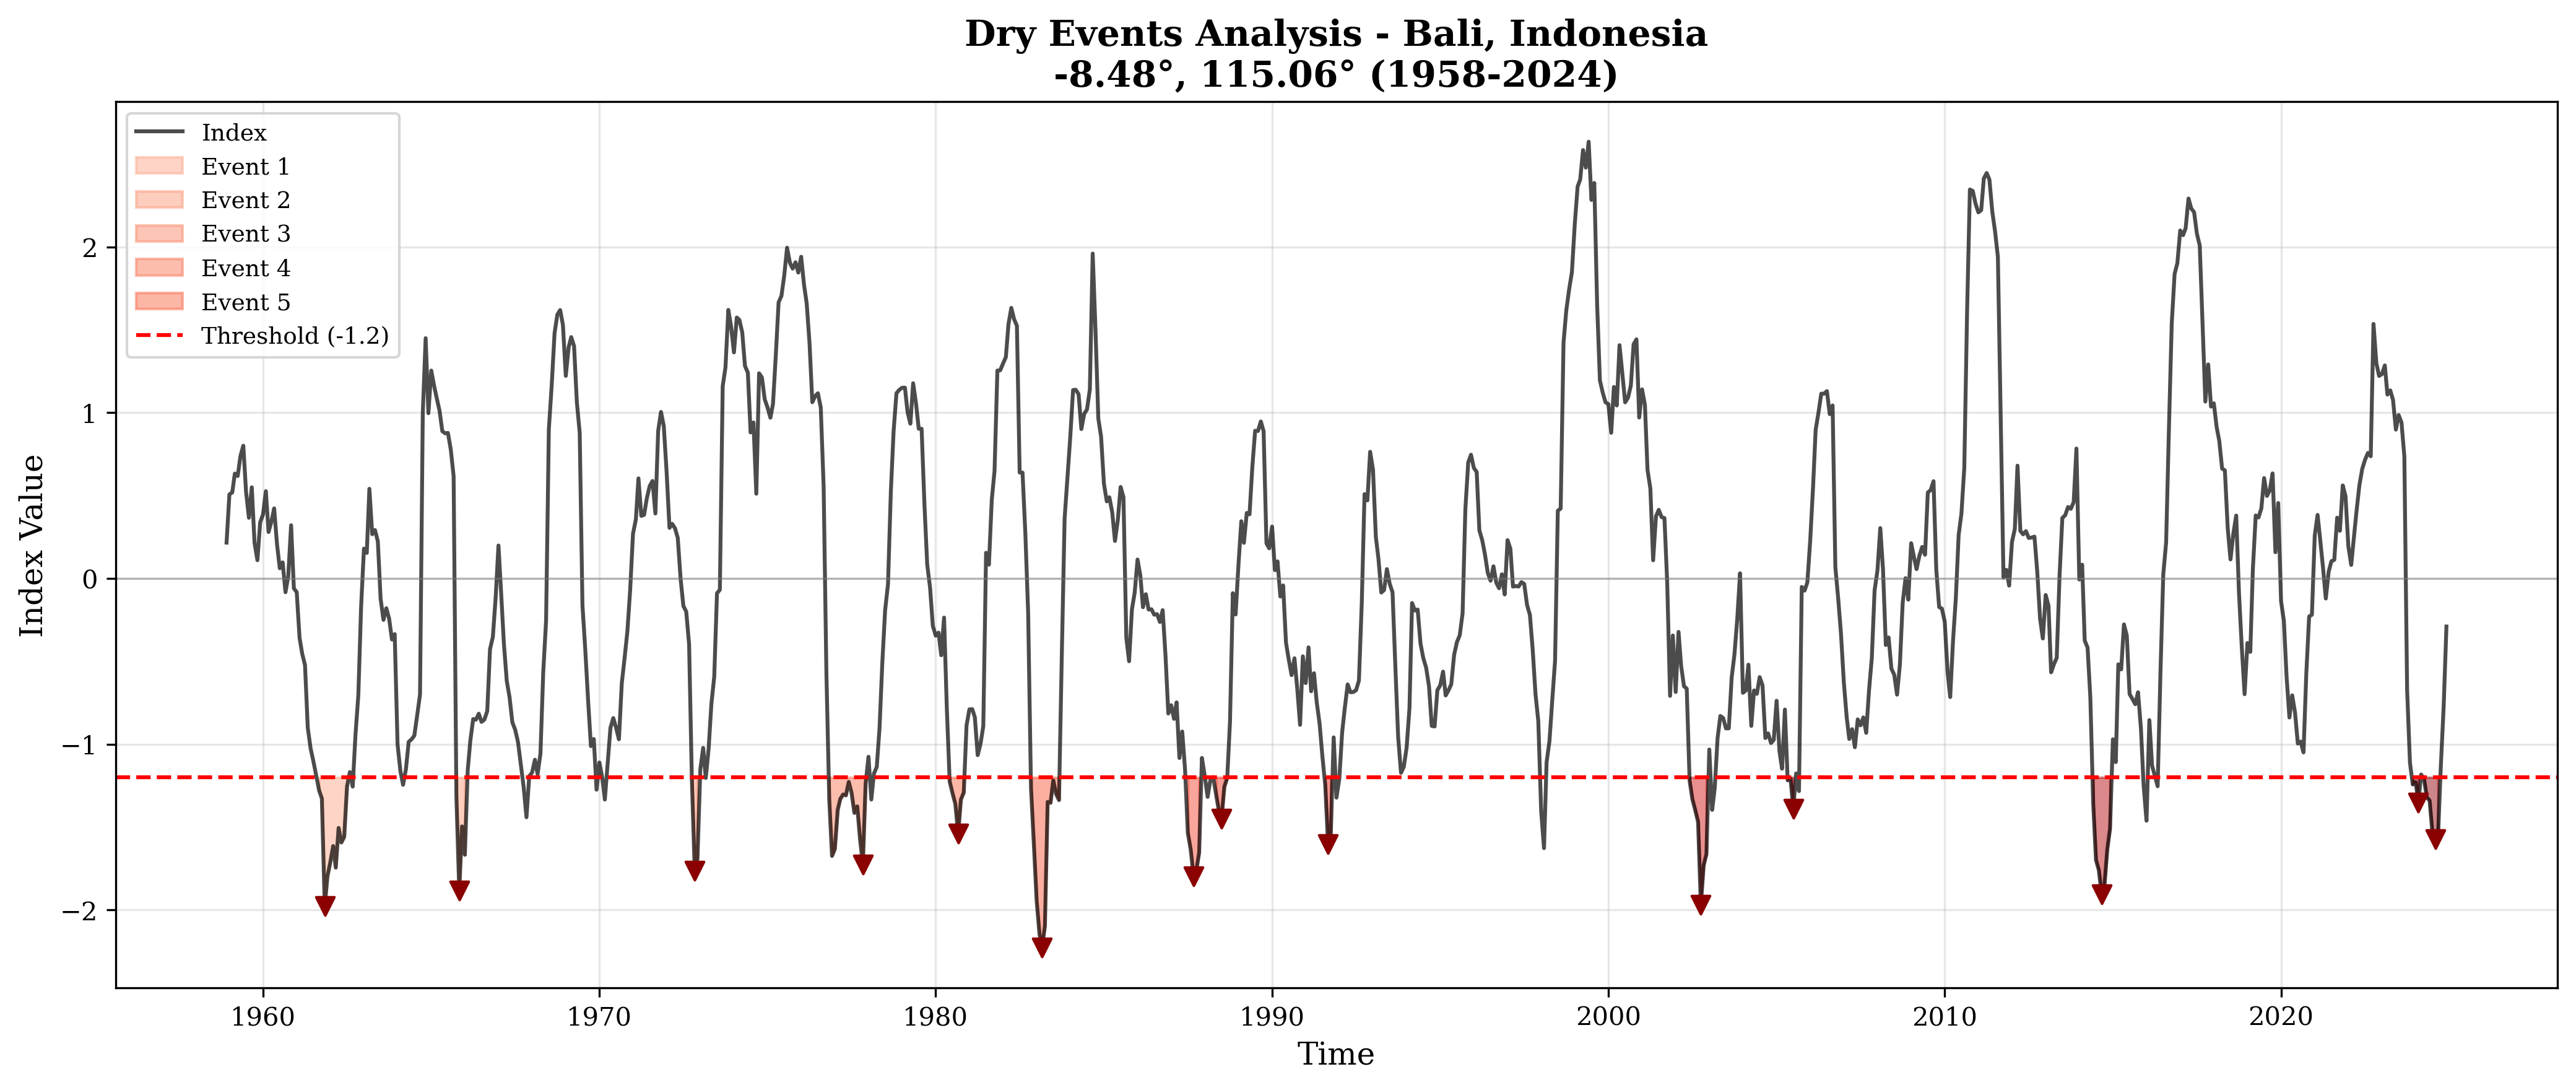

In [21]:
# Create publication-ready figure
fig = plot_events(spi_loc, events, threshold=threshold,
                  title=f'Dry Events Analysis - Bali, Indonesia\n{lat_val:.2f}°, {lon_val:.2f}° (1958-2024)')

# Save in multiple formats (build filename manually)
base = f'publication_lat{lat_val:.2f}_lon{lon_val:.2f}'
plt.savefig(f'../output/plots/single/{base}.png', dpi=300, bbox_inches='tight')
plt.savefig(f'../output/plots/single/{base}.pdf', bbox_inches='tight')  # Vector
plt.savefig(f'../output/plots/single/{base}.svg', bbox_inches='tight')  # Vector

print(f"✓ Saved publication figures:")
print(f"  {base}.png (raster, 300 dpi)")
print(f"  {base}.pdf (vector)")
print(f"  {base}.svg (vector)")

plt.show()

In [22]:
# Reset to default
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10
print("✓ Reset to default settings")

✓ Reset to default settings


## 11. Batch Processing Multiple Locations

In [23]:
# Select multiple sample locations across Bali
n_lat = len(spi.lat)
n_lon = len(spi.lon)

locations = [
    (n_lat // 4, n_lon // 4, 'Northwest Bali'),
    (n_lat // 4, 3 * n_lon // 4, 'Northeast Bali'),
    (3 * n_lat // 4, n_lon // 4, 'Southwest Bali'),
    (3 * n_lat // 4, 3 * n_lon // 4, 'Southeast Bali'),
]

print(f"Generating plots for {len(locations)} locations across Bali...")
print()

for lat_i, lon_i, name in locations:
    # Extract location
    loc_spi = spi.isel(lat=lat_i, lon=lon_i)
    loc_lat = float(spi.lat.values[lat_i])
    loc_lon = float(spi.lon.values[lon_i])
    
    # Calculate events
    loc_events = identify_events(loc_spi, threshold=threshold, min_duration=3)
    
    # Plot
    fig = plot_events(loc_spi, loc_events, threshold=threshold,
                      title=f'{name}: {loc_lat:.2f}°, {loc_lon:.2f}°')
    
    # Save with manual filename
    filename = f'batch_{name.lower().replace(" ", "_")}_lat{loc_lat:.2f}_lon{loc_lon:.2f}.png'
    plt.savefig(f'../output/plots/single/{filename}', dpi=300, bbox_inches='tight')
    plt.close()  # Close to save memory
    
    print(f"✓ {name:20s}: {len(loc_events)} events → {filename}")

print()
print(f"✓ All {len(locations)} location plots generated!")

Generating plots for 4 locations across Bali...

✓ Northwest Bali      : 17 events → batch_northwest_bali_lat-8.23_lon114.69.png


2026-01-25 12:15:47 | WARNING  | runtheory | No events found with specified criteria


✓ Northeast Bali      : 14 events → batch_northeast_bali_lat-8.23_lon115.44.png
✓ Southwest Bali      : 0 events → batch_southwest_bali_lat-8.73_lon114.69.png
✓ Southeast Bali      : 16 events → batch_southeast_bali_lat-8.73_lon115.44.png

✓ All 4 location plots generated!


## 12. Summary

### All Plot Types Covered

| # | Plot Type | Function | Best For |
|---|-----------|----------|----------|
| 1 | Basic Index | `plot_index()` | Simple time series |
| 2 | Event Timeline | `plot_events()` | Event identification |
| 3 | Characteristics | `plot_event_characteristics()` | Event analysis |
| 4 | Evolution (5-panel) | `plot_event_timeline()` | Real-time monitoring |
| 5 | Spatial Maps | `plot_spatial_stats()` | Regional patterns |

### Additional Techniques

- ✅ Magnitude comparison (cumulative vs instantaneous)
- ✅ Period comparison (historical vs recent)
- ✅ Multi-panel layouts
- ✅ Custom annotations
- ✅ Publication-quality settings
- ✅ Batch processing
- ✅ Multiple output formats (PNG, PDF, SVG)

### Best Practices

1. **DPI**: 300 for publications, 150 for presentations, 72 for web
2. **Format**: PNG for raster, PDF/SVG for vector graphics
3. **Bbox**: Always use `bbox_inches='tight'` to avoid cropping
4. **Filenames**: Use `generate_location_filename()` for consistency
5. **Memory**: Use `plt.close()` in loops to free memory
6. **Colormaps**: 
   - YlOrRd, Reds for counts/magnitudes
   - RdYlBu_r, RdBu_r for diverging (peaks, changes)

### Output Structure

```
output/plots/
├── single/           # Location-specific plots (lat/lon in filename)
│   ├── *_lat*.##_lon*.##.png
│   ├── *_lat*.##_lon*.##.pdf
│   └── *_lat*.##_lon*.##.svg
└── spatial/          # Regional maps
    ├── map_*_bali.png
    └── comparison_*_bali.png
```

### Dataset Information

All visualizations in this notebook use:
- **Location**: Bali, Indonesia
- **Data Source**: TerraClimate
- **Time Period**: 1958-2024 (67 years)
- **Index**: SPI-12 (12-month scale)
- **Resolution**: ~4km gridded data

### Next Steps

- Apply these visualizations to your own data
- Customize colormaps for your region
- Create figure panels for reports
- Explore interactive plots with Plotly (optional)
- See [docs/user-guide/visualization.md](../docs/user-guide/visualization.md) for more details

In [24]:
# Final summary
import glob

print("\n" + "="*60)
print("VISUALIZATION GALLERY COMPLETE")
print("="*60)

# Count outputs
single_plots = len(glob.glob('../output/plots/single/*'))
spatial_plots = len(glob.glob('../output/plots/spatial/*'))

print(f"\n✓ Generated {single_plots} single-location plots")
print(f"✓ Generated {spatial_plots} spatial maps")
print(f"\nAll outputs saved to ../output/plots/")
print("\nDataset: TerraClimate Bali (1958-2024)")
print("\nPlot types demonstrated:")
print("  1. Basic index visualization")
print("  2. Event timeline")
print("  3. Event characteristics")
print("  4. 5-panel evolution")
print("  5. Spatial statistics")
print("  + Magnitude comparison")
print("  + Period comparison")
print("  + Publication quality")
print("  + Batch processing")


VISUALIZATION GALLERY COMPLETE

✓ Generated 23 single-location plots
✓ Generated 12 spatial maps

All outputs saved to ../output/plots/

Dataset: TerraClimate Bali (1958-2024)

Plot types demonstrated:
  1. Basic index visualization
  2. Event timeline
  3. Event characteristics
  4. 5-panel evolution
  5. Spatial statistics
  + Magnitude comparison
  + Period comparison
  + Publication quality
  + Batch processing
